In [1]:
import sys
sys.path.insert(0, "../")

from dotenv import load_dotenv
load_dotenv()

True

In [3]:
from langgraph.graph import START, END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display

from core.schemas import InterviewState, Analyst
from core.nodes import generate_question, search_web, search_wikipedia, generate_answer, save_interview
from core.routes import route_messages

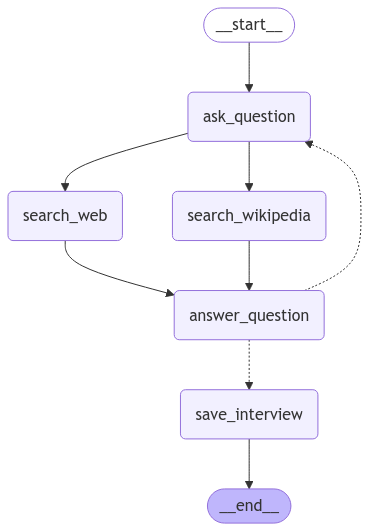

In [6]:
# Add nodes and edges 
interview_builder = StateGraph(InterviewState)
interview_builder.add_node("ask_question", generate_question)
interview_builder.add_node("search_web", search_web)
interview_builder.add_node("search_wikipedia", search_wikipedia)
interview_builder.add_node("answer_question", generate_answer)
interview_builder.add_node("save_interview", save_interview)

# Flow
interview_builder.add_edge(START, "ask_question")
interview_builder.add_edge("ask_question", "search_web")
interview_builder.add_edge("ask_question", "search_wikipedia")
interview_builder.add_edge("search_web", "answer_question")
interview_builder.add_edge("search_wikipedia", "answer_question")
interview_builder.add_conditional_edges("answer_question", route_messages,['ask_question','save_interview'])
interview_builder.add_edge("save_interview", END)

# Interview 
memory = MemorySaver()
interview_graph = interview_builder.compile(checkpointer=memory).with_config(run_name="Conduct Interviews")

# View
display(Image(interview_graph.get_graph().draw_mermaid_png()))

In [ ]:
analysts = [Analyst(
  affiliation="Game Marketing Agency", 
  name="Lila Chen", 
  role="Marketing Strategist", 
  description="Lila specializes in digital marketing strategies for indie games, focusing on social media engagement and influencer partnerships to promote cozy games on platforms like Steam."
  ),
  Analyst(
  affiliation="Gaming Community Forum", 
  name="Marcus Reed", 
  role="Community Manager", 
  description="Marcus is deeply involved in gaming communities and forums, understanding player preferences and trends. He focuses on how community feedback can shape marketing strategies for cozy games."
  )]

In [ ]:
from IPython.display import Markdown
from langchain_core.messages import HumanMessage

topic = "The importance of data science in cinemas"

messages = [HumanMessage(f"So you said you were writing an article on {topic}?")]
thread = {"configurable": {"thread_id": "1"}}
interview = interview_graph.invoke({"analyst": analysts[0], "messages": messages, "max_num_turns": 2}, thread)


In [6]:
Markdown(interview['sections'][0])

## Transforming the Film Industry: The Power of Data Analytics

### Summary
The film industry is undergoing a significant transformation driven by data analytics, which is reshaping how films are produced, marketed, and consumed. By leveraging data-driven insights, filmmakers and studios can optimize their decision-making processes, from script development to audience engagement. This shift is not only enhancing the viewer experience but also maximizing box office success.

One of the most compelling aspects of this transformation is the use of predictive modeling to forecast box office performance. By analyzing a variety of data sources—such as historical box office records, social media sentiment, and audience demographics—studios can discern patterns that correlate with a film's potential success. This approach allows for more informed casting decisions, targeted marketing campaigns, and ultimately, a better alignment of films with audience expectations [1][2][3].

Moreover, audience segmentation plays a crucial role in this data-driven landscape. By understanding the preferences and behaviors of different audience segments, studios can tailor their marketing strategies to ensure maximum impact. This level of personalization not only drives ticket sales but also fosters a deeper connection between films and their viewers [4][5]. 

Interestingly, the integration of data analytics is not limited to marketing; it extends to the creative aspects of filmmaking as well. Insights derived from data can guide script development and influence the types of stories being told, ensuring that they resonate with the target audience [1][2]. This holistic approach to data utilization is revolutionizing the industry, making it more responsive to audience needs and market trends.

As the film industry continues to embrace data analytics, it is clear that the future of filmmaking will be increasingly data-driven. This evolution presents exciting opportunities for filmmakers and studios to innovate and engage with audiences in ways that were previously unimaginable.

### Sources
[1] https://medium.com/@analyticsemergingindia/top-10-use-cases-of-data-analytics-in-film-industry-db20fda72cf1  
[2] https://filmgrail.com/blog/data-analytics-in-film-industry-audience-insights/  
[3] https://moldstud.com/articles/p-data-science-in-the-entertainment-industry-predicting-box-office-success  
[4] https://en.wikipedia.org/wiki/Market_research  
[5] https://en.wikipedia.org/wiki/Box_office  